In [53]:
!pip install emnist

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import emnist
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [55]:
images_byclass, labels_byclass = emnist.extract_training_samples('byclass')

In [56]:
print("ByClass Split - Images:", images_byclass.shape, "Labels:", labels_byclass.shape)

ByClass Split - Images: (697932, 28, 28) Labels: (697932,)


In [57]:
def dataPreprocess(images_byclass,labels_byclass):
    
    #splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
    images_byclass, labels_byclass, test_size=0.2, random_state=42)
    
    print(f"There are {len(np.unique(y_train))} output values")
    print(f"X_train Shape: {x_train.shape} ,, X_test shape : {x_test.shape}")
    
    #converting into categorical form
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    #reshaping the training images
    x_train = x_train.reshape((558345, 28, 28, 1))
    x_test = x_test.reshape((139587,28,28,1))
    
    #normalizing
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    return x_train,x_test,y_train,y_test

In [58]:
x_train,x_test,y_train,y_test = dataPreprocess(images_byclass,labels_byclass)

There are 62 output values
X_train Shape: (558345, 28, 28) ,, X_test shape : (139587, 28, 28)


In [59]:
datagen = ImageDataGenerator(
    rotation_range = 30, 
    zoom_range=0.2,
    shear_range = 0.2,
    width_shift_range=0.2, 
    height_shift_range = 0.2,
)

datagen2 = ImageDataGenerator()
datagen2.fit(x_test)
datagen.fit(x_train)

In [60]:
# Build the model
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(62,activation="softmax"))

In [61]:

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 25, 25, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 22, 22, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 19, 19, 32)       

In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=datagen.flow(x_test,y_test,batch_size=32))

Epoch 1/10
17449/17449 [==============================] - 266s 15ms/step - loss: 0.9401 - accuracy: 0.7088 - val_loss: 0.7321 - val_accuracy: 0.7592
Epoch 2/10
17449/17449 [==============================] - 263s 15ms/step - loss: 0.6944 - accuracy: 0.7708 - val_loss: 0.6738 - val_accuracy: 0.7753
Epoch 3/10
17449/17449 [==============================] - 259s 15ms/step - loss: 0.6520 - accuracy: 0.7829 - val_loss: 0.6512 - val_accuracy: 0.7802
Epoch 4/10
17449/17449 [==============================] - 259s 15ms/step - loss: 0.6312 - accuracy: 0.7890 - val_loss: 0.6351 - val_accuracy: 0.7896
Epoch 5/10
17449/17449 [==============================] - 259s 15ms/step - loss: 0.6200 - accuracy: 0.7922 - val_loss: 0.6047 - val_accuracy: 0.7963
Epoch 6/10
17449/17449 [==============================] - 258s 15ms/step - loss: 0.6153 - accuracy: 0.7934 - val_loss: 0.6329 - val_accuracy: 0.7902
Epoch 7/10
17449/17449 [==============================] - 265s 15ms/step - loss: 0.6093 - accuracy: 0.7948

In [64]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

4363/4363 [==============================] - 14s 3ms/step - loss: 0.5100 - accuracy: 0.8235
Test accuracy: 0.8234649300575256


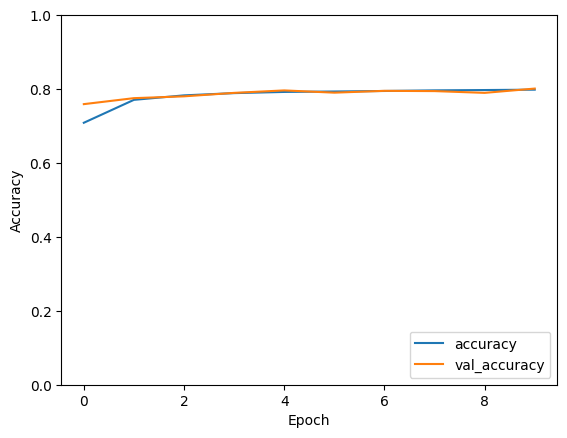

In [65]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [66]:
model.save('my_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
